In [1]:
import lightkurve as lk

In [2]:
avail = lk.search_lightcurve('TIC 26542657')
avail

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 04,2010,Kepler,1800,kplr012013550,0.0
1,Kepler Quarter 08,2011,Kepler,1800,kplr012013550,0.0
2,Kepler Quarter 11,2012,Kepler,1800,kplr012013550,0.0
3,Kepler Quarter 12,2012,Kepler,1800,kplr012013550,0.0
4,Kepler Quarter 15,2013,Kepler,1800,kplr012013550,0.0
5,Kepler Quarter 16,2013,Kepler,1800,kplr012013550,0.0
6,TESS Sector 14,2019,SPOC,120,26542657,0.0
7,TESS Sector 14,2019,TESS-SPOC,1800,26542657,0.0
8,TESS Sector 14,2019,QLP,1800,26542657,0.0


In [3]:
kepler = avail[[2,3]].download_all().stitch()

(0.997, 1.003)

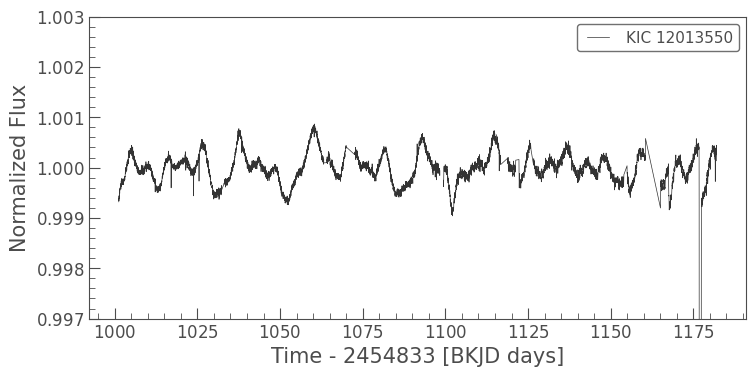

In [4]:
kepler.flatten(window_length=1801).plot()
plt.ylim(.997,1.003)

/Users/smullally/miniconda3/envs/exovetter/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(0.0, 2.0)

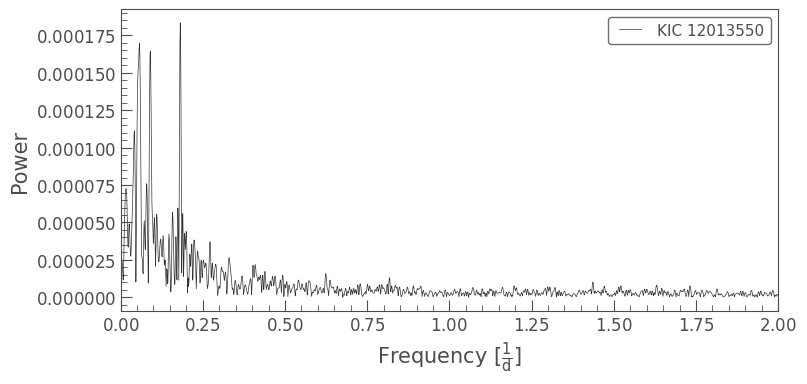

In [5]:
keplerflat = kepler.flatten(window_length=1801).remove_outliers()
keplerper = keplerflat.to_periodogram(method='lombscargle')
keplerper.plot()
plt.xlim(0,2)

11.02398054116326 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

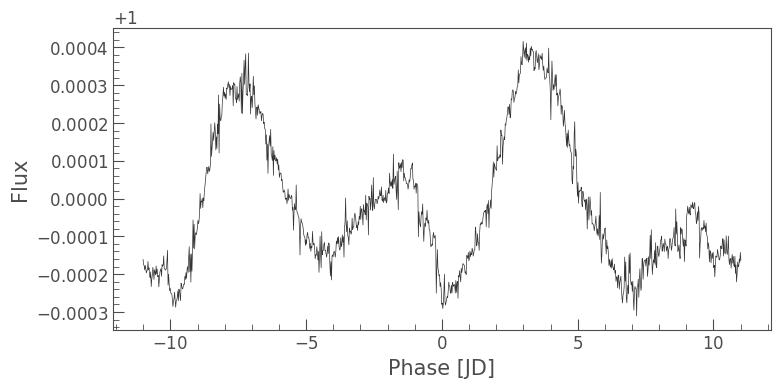

In [6]:
print(keplerper.period_at_max_power*2)
keplerflat.remove_outliers().fold(keplerper.period_at_max_power*4).bin(time_bin_size=.02).plot()

In [7]:
kepler = avail[[4,5]].download_all().stitch()

(0.997, 1.003)

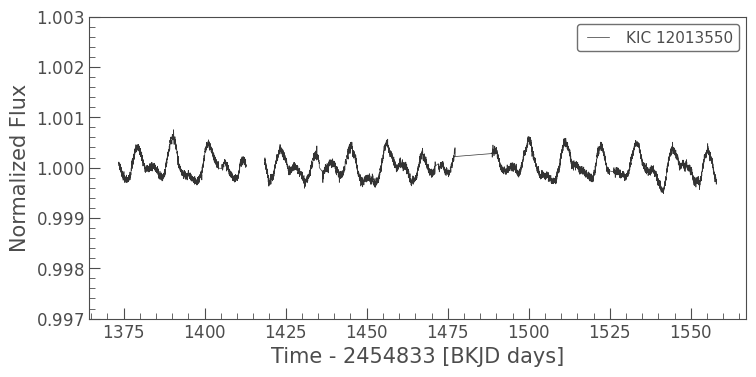

In [8]:
kepler.flatten(window_length=1501).plot()
plt.ylim(.997,1.003)

In [9]:
keplerflat = kepler.flatten(window_length=2000)

(0.0, 1.0)

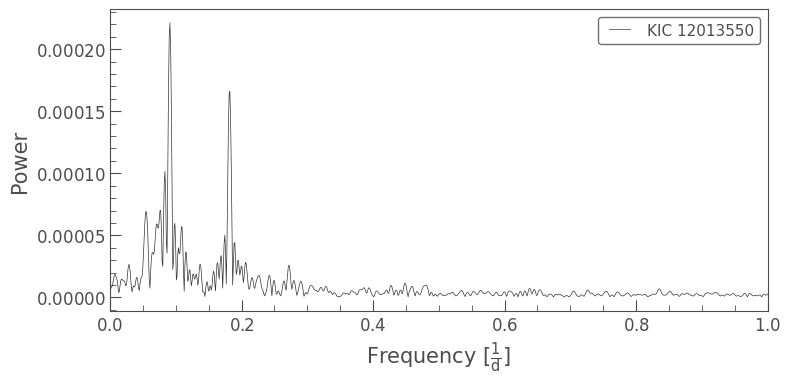

In [10]:
keplerper = keplerflat.remove_outliers().to_periodogram(method='lombscargle')
keplerper.plot()
plt.xlim(0,1)

10.979223541212159 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

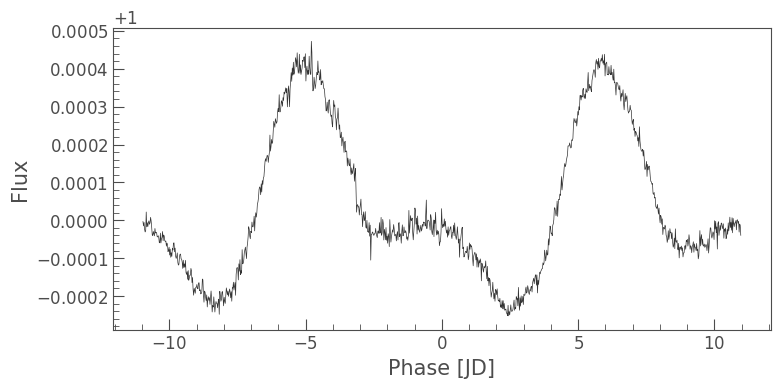

In [12]:
print(keplerper.period_at_max_power)
keplerflat.remove_outliers().fold(keplerper.period_at_max_power*2).bin(time_bin_size=.02).plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

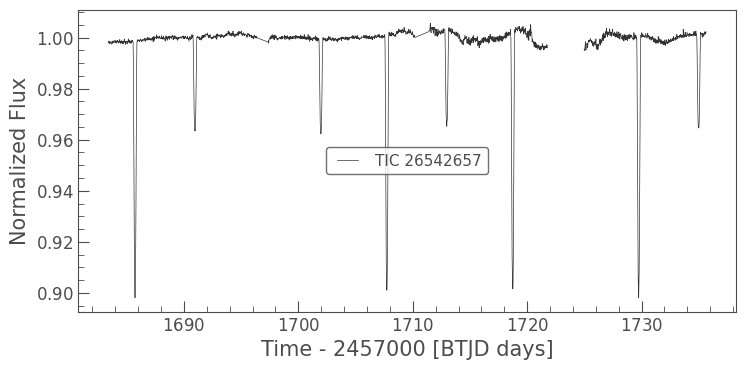

In [13]:
tesslc = avail[[7,12]].download_all()
tesslc.stitch().plot()
#plt.ylim(.996,1.006)

(0.996, 1.006)

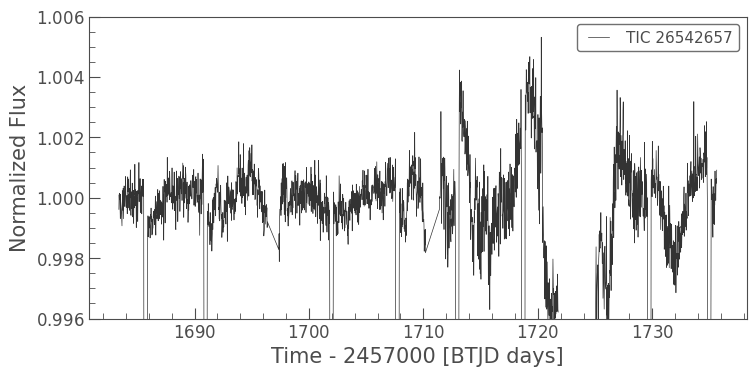

In [14]:
tessflat = tesslc.stitch().flatten(window_length=1001)
tessflat.plot()
plt.ylim(.996,1.006)

(8.0, 13.0)

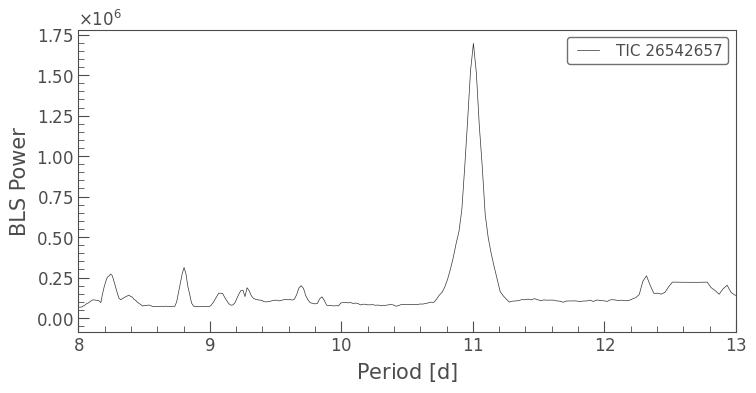

In [15]:
tessper = tessflat.to_periodogram(method="bls")
tessper.plot()
plt.xlim(8,13)

In [16]:
tessper.period_at_max_power

<Quantity 11.00426542 d>

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux'>

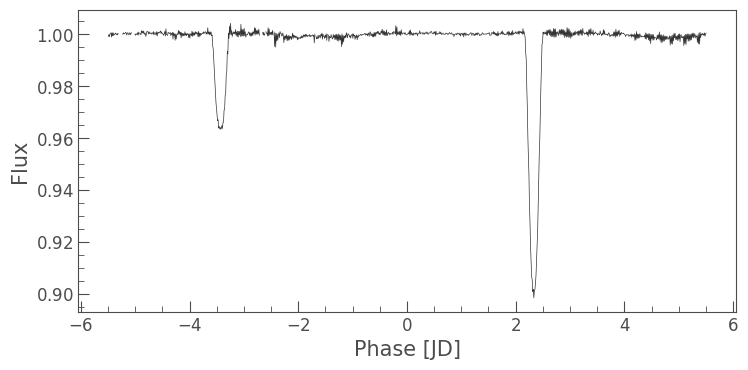

In [17]:
tessflat.fold(tessper.period_at_max_power).bin(time_bin_size=.01).plot()

(0.996, 1.004)

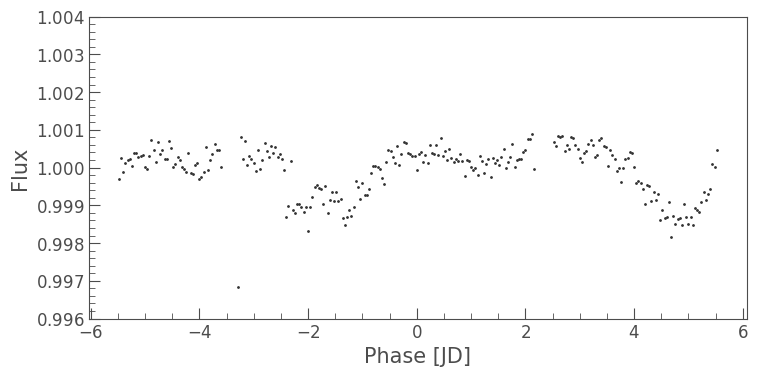

In [22]:
tessflat.fold(tessper.period_at_max_power).bin(time_bin_size=.04).scatter()
plt.ylim(.996,1.004)